In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [4]:
cpu = pd.read_csv("/Users/yjh/Desktop/CPU/엑셀/통합 문서2.csv")

In [5]:
cpu.head()

,전체 IPC
0,"H01M-010/42,A62C-003/16, A62C-037/38, H01M-010..."
1,"H01M-010/48,A62C-003/16, A62C-037/38, A62C-099..."
2,"H01M-010/658,H01M-050/289, H01M-010/0525, H01M..."
3,"H01M-010/6568,H01M-010/613, H01M-010/625, H01M..."
4,"H01M-010/42,A62C-003/07, A62C-003/16, B60L-003..."


In [6]:
cpu_re = cpu['전체 IPC'].str.split(',')

In [7]:
cpu_re.head()

0    [H01M-010/42, A62C-003/16,  A62C-037/38,  H01M...
1    [H01M-010/48, A62C-003/16,  A62C-037/38,  A62C...
2    [H01M-010/658, H01M-050/289,  H01M-010/0525,  ...
3    [H01M-010/6568, H01M-010/613,  H01M-010/625,  ...
4    [H01M-010/42, A62C-003/07,  A62C-003/16,  B60L...
Name: 전체 IPC, dtype: object

In [8]:
cpu_re = cpu_re.apply(lambda x: pd.Series(x))

In [9]:
cpu_re.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,H01M-010/42,A62C-003/16,A62C-037/38,H01M-010/48,H01M-050/251,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H01M-010/48,A62C-003/16,A62C-037/38,A62C-099/00,G08B-017/10,G08B-007/00,H01M-010/42,H01M-050/242,H01M-050/249,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H01M-010/658,H01M-050/289,H01M-010/0525,H01M-010/647,H01M-050/209,H01M-050/30,H01M-010/613,H01M-050/271,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H01M-010/6568,H01M-010/613,H01M-010/625,H01M-010/6557,H01M-050/209,H01M-010/63,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H01M-010/42,A62C-003/07,A62C-003/16,B60L-003/00,H01M-050/24,H01M-050/244,H01M-050/249,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
cpu_re.stack()

0    0      H01M-010/42
     1      A62C-003/16
     2      A62C-037/38
     3      H01M-010/48
     4     H01M-050/251
              ...      
292  5      H01M-010/50
293  0      H01M-010/38
294  0      H01M-010/52
     1      H01M-002/12
     2      A62C-003/16
Length: 1293, dtype: object

In [11]:
cpu_re = cpu_re.stack().reset_index(level = 1, drop = True).to_frame('IPC')

In [12]:
cpu_re

,IPC
0,H01M-010/42
0,A62C-003/16
0,A62C-037/38
0,H01M-010/48
0,H01M-050/251
...,...
292,H01M-010/50
293,H01M-010/38
294,H01M-010/52
294,H01M-002/12


In [13]:
print("IPC" + str(cpu_re['IPC'].nunique()))

IPC310


In [14]:
cpu_re['IPC'].value_counts()

H01M-002/10     78
H01M-010/42     48
H01M-010/48     48
H01M-002/12     47
 H01M-010/42    41
                ..
 G08B-021/02     1
 G08B-025/14     1
 C09D-179/02     1
 C09D-005/24     1
H01M-010/38      1
Name: IPC, Length: 310, dtype: int64

In [15]:
a = cpu_re['IPC'].value_counts()
b = pd.Series.to_frame(a, name = "개수")
print(b)

              개수
H01M-002/10   78
H01M-010/42   48
H01M-010/48   48
H01M-002/12   47
 H01M-010/42  41
...           ..
 G08B-021/02   1
 G08B-025/14   1
 C09D-179/02   1
 C09D-005/24   1
H01M-010/38    1

[310 rows x 1 columns]


In [16]:
cpu_ipc = b.reset_index(inplace = False)

In [17]:
cpu_ipc.columns = ['IPC', '개수']

In [18]:
cpu_ipc

,IPC,개수
0,H01M-002/10,78
1,H01M-010/42,48
2,H01M-010/48,48
3,H01M-002/12,47
4,H01M-010/42,41
...,...,...
305,G08B-021/02,1
306,G08B-025/14,1
307,C09D-179/02,1
308,C09D-005/24,1


In [19]:
g = nx.Graph()

In [20]:
g = nx.from_pandas_edgelist(cpu_ipc, source = '개수', target = 'IPC')

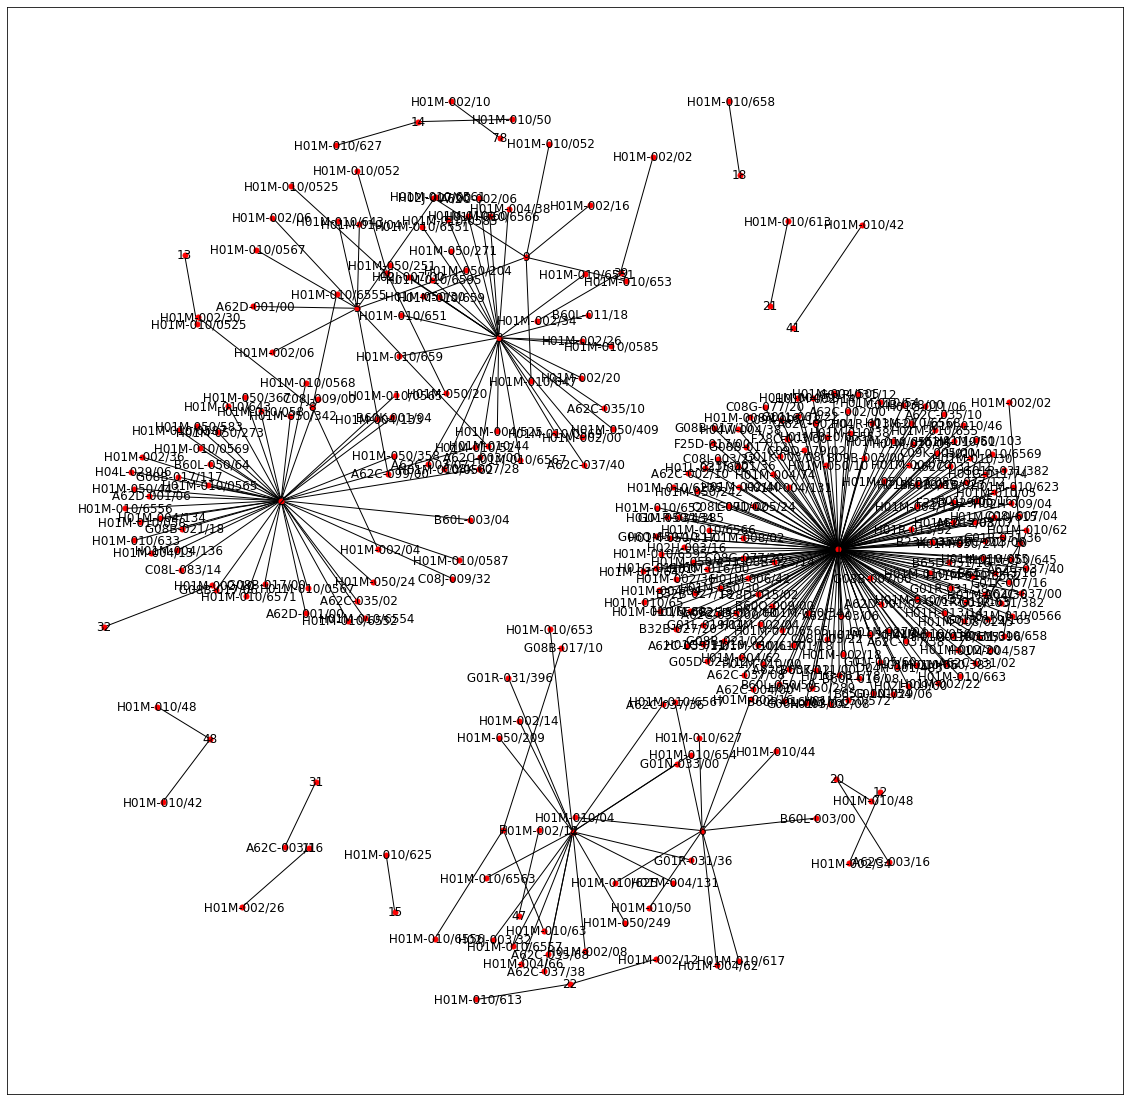

In [21]:
plt.figure(figsize = (20, 20))
pos = nx.spring_layout(g, k = 0.2)
nx.draw_networkx(g, pos, node_size = 25, node_color = 'red')
plt.show()

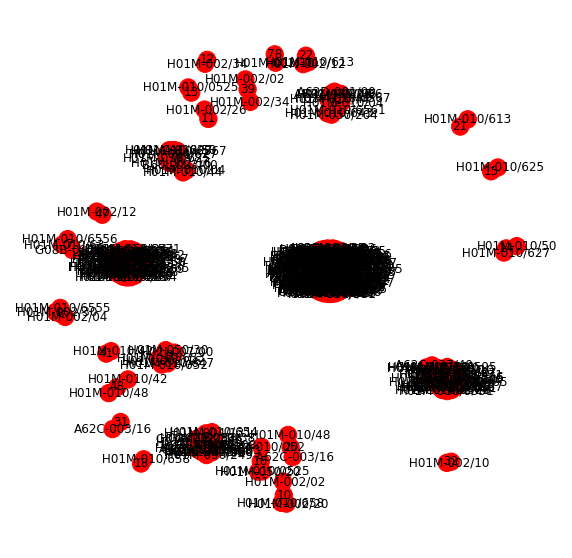

In [36]:
color_map = []
for node in g:
    if g.degree(node) >= 20:   # 중요한 노드 (degree가 8 이상)
        color_map.append('pink')
    else: 
        color_map.append('red')

plt.figure(figsize=(10, 10))  # size 설정

pos = nx.spring_layout(g, scale=3)   # spring layout 사용, 글씨가 잘리는 것을 방지하기 위해 scale=0.2로 조정
nx.draw_networkx(g, pos, node_color=color_map, edge_color='black')

plt.axis('off') # turn off axis 
plt.show()

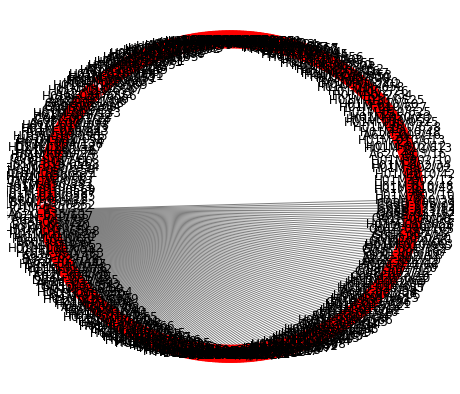

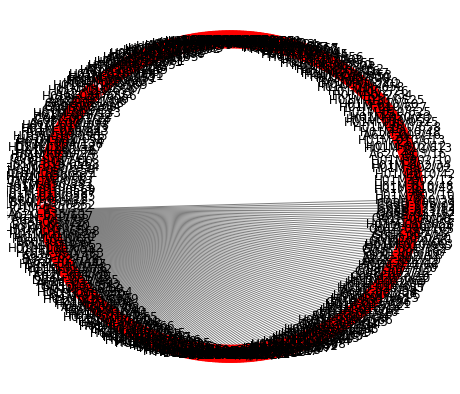

In [33]:
plt.figure(figsize=(8, 7))

pos = nx.circular_layout(g, scale=0.2)   # circular layout 모양
nx.draw_networkx(g, pos, node_color=color_map, edge_color='grey')  # 위에서 지정한 color_map 그대로 사용

plt.axis('off') # turn off axis 
plt.show()

plt.figure(figsize=(8, 7))

pos = nx.circular_layout(g, scale=0.2)   # circular layout 모양
nx.draw_networkx(g, pos, node_color=color_map, edge_color='grey')  # 위에서 지정한 color_map 그대로 사용

plt.axis('off') # turn off axis 
plt.show()

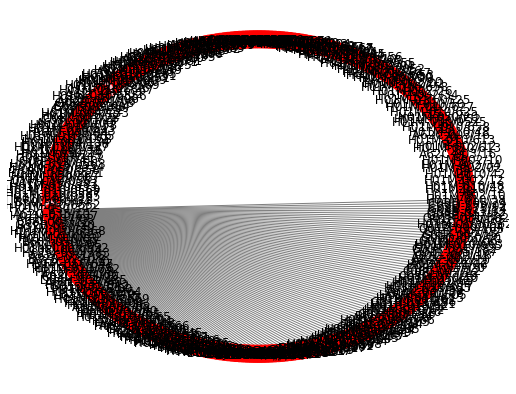

In [35]:
plt.figure(figsize=(9, 7))

pos = nx.circular_layout(g)
nx.draw_networkx(g, pos, node_color=color_map, edge_color='grey') 

plt.axis('off')
plt.show()